In [ ]:
import tensorflow as tf
import os
# Define image size and batch size
IMG_SIZE = (160, 160)  # Resize images to 160x160
BATCH_SIZE = 32

# Define paths
dataset_path = '../anamelClassification.v1i.multiclass'
# Load datasets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'train'),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'val'),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    os.path.join(dataset_path, 'test'),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 400 files belonging to 4 classes.
Found 50 files belonging to 4 classes.
Found 50 files belonging to 4 classes.


In [2]:
# Load the EfficientNetB0 base model
base_model = tf.keras.applications.EfficientNetB1(input_shape=(160, 160, 3),
                                                  include_top=False,
                                                  weights='imagenet')

# Freeze the base model
base_model.trainable = False

# Add custom layers on top of EfficientNet
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),  # Regularization
    tf.keras.layers.Dense(4, activation='softmax')  # Assuming 4 classes
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['sparse_categorical_accuracy'])

# Train the model
initial_epochs = 10
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=valid_dataset)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - loss: 1.3507 - sparse_categorical_accuracy: 0.3597 - val_loss: 0.8422 - val_sparse_categorical_accuracy: 0.6600
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 669ms/step - loss: 0.8419 - sparse_categorical_accuracy: 0.6960 - val_loss: 0.6213 - val_sparse_categorical_accuracy: 0.8000
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 659ms/step - loss: 0.5912 - sparse_categorical_accuracy: 0.7899 - val_loss: 0.4911 - val_sparse_categorical_accuracy: 0.9000
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 589ms/step - loss: 0.4961 - sparse_categorical_accuracy: 0.8377 - val_loss: 0.4182 - val_sparse_categorical_accuracy: 0.9000
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - loss: 0.4129 - sparse_categorical_accuracy: 0.8657 - val_loss: 0.3769 - val_sparse_categorical_accuracy: 0.9000
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 553ms/step - loss: 0.3958 - sparse_categorical_accuracy: 0.8983 - val_loss: 0.3483 - val_sparse_categorical_accuracy: 0.9000
Epoch 

In [3]:

# Unfreeze the base model for fine-tuning
base_model.trainable = True
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Compile the model for fine-tuning
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate / 10), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['sparse_categorical_accuracy'])

Number of layers in the base model:  340


In [4]:
# Fine-tune for a few more epochs
fine_tune_epochs = 10
total_epochs = initial_epochs + fine_tune_epochs

# Fit the model with the fine-tuning
history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],  # Start from the last epoch of previous training
                         validation_data=valid_dataset)



Epoch 10/20


c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 2s/step - loss: 0.9475 - sparse_categorical_accuracy: 0.6326 - val_loss: 0.2835 - val_sparse_categorical_accuracy: 0.9200
Epoch 11/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.8068 - sparse_categorical_accuracy: 0.7037 - val_loss: 0.2962 - val_sparse_categorical_accuracy: 0.9200
Epoch 12/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.7176 - sparse_categorical_accuracy: 0.7642 - val_loss: 0.3133 - val_sparse_categorical_accuracy: 0.9200
Epoch 13/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - loss: 0.7091 - sparse_categorical_accuracy: 0.7544 - val_loss: 0.3289 - val_sparse_categorical_accuracy: 0.9200
Epoch 14/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - loss: 0.6678 - sparse_categorical_accuracy: 0.8089 - val_loss: 0.3409 - val_sparse_categorical_accuracy: 0.9000
Epoch 15/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - loss: 0.5906 - sparse_categorical_accuracy: 0.8293 - val_loss: 0.3480 - val_sparse_categorical_accuracy: 0.9200
Epoch 16/20
13/13 ━━━━

In [5]:
# Evaluate on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - loss: 0.4344 - sparse_categorical_accuracy: 0.8992
Test Accuracy: 0.8800
Test Loss: 0.4881


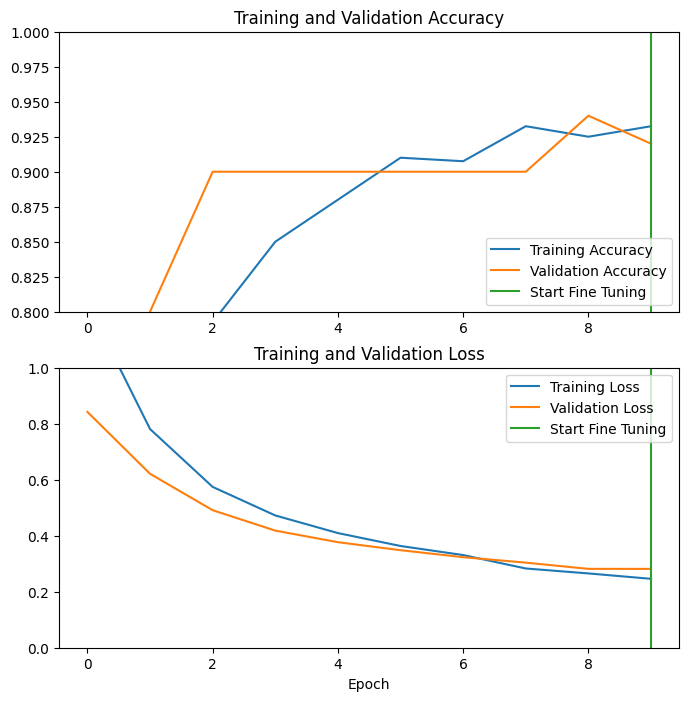

In [9]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy and loss
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Training and Validation Accuracy and Loss
plt.figure(figsize=(8, 8))

# Accuracy Plot
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Loss Plot
plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs - 1, initial_epochs - 1], plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()




Found 50 images belonging to 4 classes.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


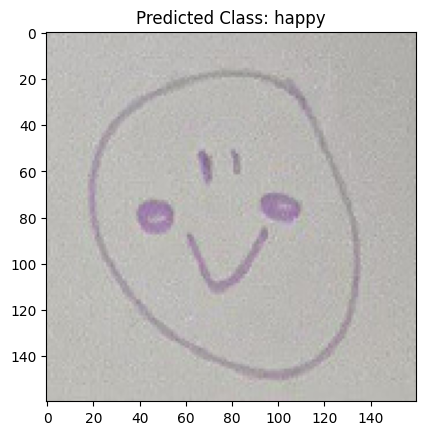

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Create the test generator (assuming 'test' folder is correct)
test_data = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test = test_data.flow_from_directory('../anamelClassification.v1i.multiclass/test', 
                                     target_size=(160, 160), 
                                     batch_size=32, 
                                     class_mode='categorical')

# Get one batch from the generator
image_batch, label_batch = next(test)

# Pick the first image in the batch
image = image_batch[0]
label = label_batch[0]

# Get the class names from the generator
class_names = list(test.class_indices.keys())

# Make a prediction
predicted_class_index = np.argmax(model.predict(np.expand_dims(image, axis=0)))

# Get the predicted class name
predicted_class_name = class_names[predicted_class_index]

# Display the image with the predicted class name as title
plt.imshow(image)
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()


In [19]:
model.save('EfficientNetB1.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


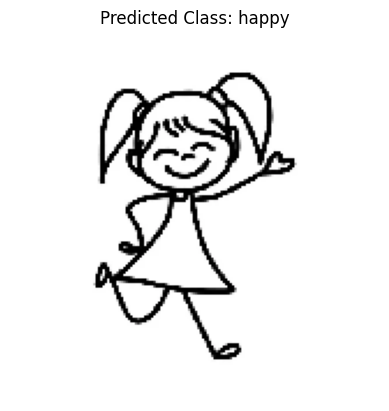

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model
model = tf.keras.models.load_model('EfficientNetB1.h5')

# Define the class names (ensure this matches your training setup)
class_names = ['Anger and aggression', 'anxiety', 'happy', 'sad']

# Path to the image you want to test
image_path = '../not-from-dataset/depositphotos_52843447-stock-illustration-hand-drawing-happy-kids.jpg'  # Replace with your image path


# Load the image with the same target size used during training
target_size = (160, 160)  # Update to the model's expected input size
image = load_img(image_path, target_size=target_size)

# Convert the image to a numpy array and preprocess it
image_array = img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
image_array = image_array / 255.0  # Rescale the image (if necessary)

# Make a prediction
predicted_class_index = np.argmax(model.predict(image_array))
predicted_class_name = class_names[predicted_class_index]

# Display the image with the predicted class name as the title
plt.imshow(image)
plt.axis('off')
plt.title(f"Predicted Class: {predicted_class_name}")
plt.show()